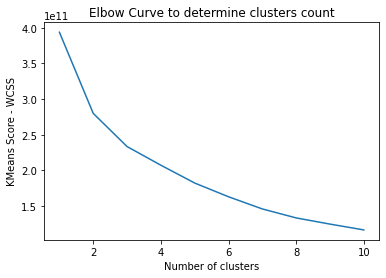

Silhouette score before Scaling : 0.46657902186659234
Silhouette score after feature Scaling : 0.3396132298444733
Silhouette score after applying PCA: 0.511339935435697


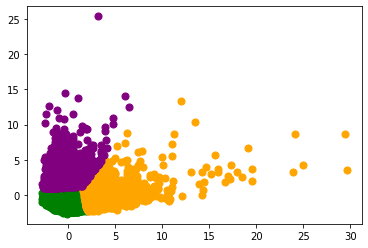

In [1]:
# 1.	Apply K means clustering in the data set provided below:
# •	Remove any null values by the mean.
# •	Use the elbow method to find a good number of clusters with the KMeans algorithm
# •	Calculate the silhouette score for the above clustering
# 2.	Try feature scaling and then apply KMeans on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why
# 3.	Apply PCA on the same dataset. Apply kMeans algorithm on the PCA result and report your observation if the silhouette score improved or not?

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# fetching the data from CC.csv file
data_cc = pd.read_csv("CC.csv")

X = data_cc.iloc[:, 1:]
X = X.select_dtypes(include=[np.number]).interpolate().fillna(X.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

# 1. Used the elbow method for finding a good number of clusters with the KMeans algorithm
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Curve to determine clusters count")
plt.xlabel("Number of clusters")
plt.ylabel("KMeans Score - WCSS")
plt.show()

# calculating the silhouette score for the above obtained clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)                                             # model is trained
y_clst_kmeans = kmeans.predict(X)                         # model is used to predict the clusters
elbow_score = metrics.silhouette_score(X, y_clst_kmeans)  # silhouette score

## 2. feature scaling
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# applied KMeans on the scaled features
fscaled_kmeans = KMeans(n_clusters=3, random_state=42)
fscaled_kmeans.fit(X_scaled)
y_scaled_kmeans = fscaled_kmeans.predict(X_scaled)

# calculating Silhouette score
fscaled_score = metrics.silhouette_score(X, y_scaled_kmeans)

##3. applied PCA on the same dataset
pca = PCA(3)
X_pca = pca.fit_transform(X)

# applied kMeans algorithm on the PCA result
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca)
y_pca_kmeans = kmeans_pca.predict(X_pca)                        # model is used to predict the clusters
pca_score = metrics.silhouette_score(X_pca, y_pca_kmeans)       # silhouette score

# KMeans Model after applying PCA on scaled data
pca_scaled = PCA(2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

kmeans_pca_sc = KMeans(n_clusters=3)
kmeans_pca_sc.fit(X_pca_scaled)
y_pca_kmeans_sc = kmeans_pca_sc.predict(X_pca_scaled)           # model is used to predict the clusters
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_sc)  # silhouette score
y_pca_kmeans_sc

# comparisons of silhouette score
print("Silhouette score before Scaling :", elbow_score)
print("Silhouette score after feature Scaling :", fscaled_score)
print("Silhouette score after applying PCA:", pca_score)

# 4. visualizing the clustering
col = ["green", "orange", "purple"]
for i in range(3):
    x_axis = X_pca_scaled[y_pca_kmeans_sc == i][:, 0]
    y_axis = X_pca_scaled[y_pca_kmeans_sc == i][:, 1]
    plt.scatter(x_axis, y_axis, color=col[i], s=50)
plt.show()
